In [1]:
import numpy as np
import pandas as pd

In [4]:
laptops = pd.read_csv("laptops.csv", encoding="latin-1")
laptops.head()

Manufacturer   Model Name   Category Screen Size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               Screen                         CPU   RAM  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               Storage                           GPU Operating System  \
0            128GB SSD  Intel Iris Plus Graphics 640            macOS   
1  128GB Flash Storage        Intel HD Graphics 6000            macOS   
2            256GB SSD         Intel HD Graphics 620            No OS   
3            512GB SSD            AMD Radeon Pro 455            macOS   
4            256GB SSD  Intel Iris Plus Graphics 650            macOS   

  Operating System Version  Weight Price (Euros)  
0                      NaN  1.37kg       1339,69  
1                      NaN  1.34kg        898,94  
2                      NaN  1.86kg        575,00  
3                      NaN  1.83kg       2537,45  
4                      NaN  1.37kg       1803,60

1/ Redo the cleaning processes as presented in the data cleaning notebook, that include:
- Clean column names

- Convert RAM, Price, Weight into numerical columns (create new columns)

- Extract CPU speed from CPU column

- Correcting values of os column

- Handle missing values of os_version column

2/ Convert Screen Size column in to numeric and use that column to answer:
- What is the popular screen size ?
- What is the minimum screen size of Ultrabook ?
- What is the average screen size of gaming laptop ?

3/ Extract Screen Resolution (for example 2880x1800), and answer:
- How many laptop has full hd (1920x1080) screen ?
- What is the popular screen resolution of Macbook ?

4/ Using column storage to create 3 new columns named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. Use this column to answer:
- How many laptop have ssd storage ? How many laptop have hdd storage ?
- On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

# 1

In [5]:
laptops.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')

In [6]:
def clean_label(s):
    s = s.strip()
    s = s.replace("Operating System", "os")
    s = s.replace(" ", "_")
    s = s.replace("(", "")
    s = s.replace(")", "")
    s = s.lower()
    return s

In [7]:
new_label = [clean_label(label) for label in laptops.columns]

In [8]:
new_label

['manufacturer',
 'model_name',
 'category',
 'screen_size',
 'screen',
 'cpu',
 'ram',
 'storage',
 'gpu',
 'os',
 'os_version',
 'weight',
 'price_euros']

In [9]:
laptops.columns = new_label

In [10]:
laptops.head()

manufacturer   model_name   category screen_size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               screen                         cpu   ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               storage                           gpu     os os_version  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS        NaN   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS        NaN   
2            256GB SSD         Intel HD Graphics 620  No OS        NaN   
3            512GB SSD            AMD Radeon Pro 455  macOS        NaN   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS        NaN   

   weight price_euros  
0  1.37kg     1339,69  
1  1.34kg      898,94  
2  1.86kg      575,00  
3  1.83kg     2537,45  
4  1.37kg     1803,60

In [11]:
laptops['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [12]:
laptops['ram_gb'] = laptops['ram'].str.slice(0, -2).astype('int')

In [13]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
manufacturer    1303 non-null object
model_name      1303 non-null object
category        1303 non-null object
screen_size     1303 non-null object
screen          1303 non-null object
cpu             1303 non-null object
ram             1303 non-null object
storage         1303 non-null object
gpu             1303 non-null object
os              1303 non-null object
os_version      1133 non-null object
weight          1303 non-null object
price_euros     1303 non-null object
ram_gb          1303 non-null int32
dtypes: int32(1), object(13)
memory usage: 137.5+ KB


In [14]:
laptops['price_euros_num'] = laptops['price_euros'].str.replace(",", ".").astype("float")

In [15]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
dtypes: float64(1), int32(1), object(13)
memory usage: 147.7+ KB


In [16]:
laptops['weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [17]:
laptops['weight'].str.match(".*[0-9](kg)$").all()

False

In [18]:
laptops['weight'][~laptops.weight.str.match(".*[0-9](kg)$")]

1061    4kgs
Name: weight, dtype: object

In [19]:
laptops['weight_kg'] = laptops['weight'].str.replace("kg", "").str.replace('s', '')

In [20]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
weight_kg          1303 non-null object
dtypes: float64(1), int32(1), object(14)
memory usage: 157.9+ KB


In [21]:
laptops['cpu'].head()

0          Intel Core i5 2.3GHz
1          Intel Core i5 1.8GHz
2    Intel Core i5 7200U 2.5GHz
3          Intel Core i7 2.7GHz
4          Intel Core i5 3.1GHz
Name: cpu, dtype: object

In [22]:
laptops['cpu_speed_ghz'] = laptops['cpu'].str.replace("GHz", "").str.extract(" ([0-9\.]*)$").astype("float")

In [23]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
weight_kg          1303 non-null object
cpu_speed_ghz      1303 non-null float64
dtypes: float64(2), int32(1), object(14)
memory usage: 168.0+ KB


In [24]:
laptops['os'].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: os, dtype: int64

In [25]:
mapping = {"Windows": "Windows", "No OS": "No OS", "Linux": "Linux", "Chrome OS": "Chrome OS",
           "macOS": "macOS", "Mac OS": "macOS", "Android": "Android"}

In [26]:
laptops['os_new'] = laptops['os'].map(mapping)

In [27]:
laptops['os_new'].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: os_new, dtype: int64

In [28]:
laptops['os_version'].value_counts(dropna=False)

10      1072
NaN      170
7         45
10 S       8
X          8
Name: os_version, dtype: int64

In [29]:
laptops.loc[laptops['os_version'].isnull(), 'os'].value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: os, dtype: int64

In [30]:
laptops.loc[laptops['os_new'] == "macOS", "os_version"].value_counts(dropna=False)

NaN    13
X       8
Name: os_version, dtype: int64

In [31]:
laptops_copy = laptops.copy()

In [32]:
laptops_copy.loc[laptops['os_new'] == "No OS", "os_version"] = "Non OS"

In [33]:
laptops_copy.loc[laptops['os_new'] == "macOS", "os_version"] = "X"

In [34]:
laptops_copy['os_version'].value_counts(dropna=False)

10        1072
NaN         91
Non OS      66
7           45
X           21
10 S         8
Name: os_version, dtype: int64

# 2

In [35]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
weight_kg          1303 non-null object
cpu_speed_ghz      1303 non-null float64
os_new             1303 non-null object
dtypes: float64(2), int32(1), object(15)
memory usage: 178.2+ KB


In [36]:
laptops['screen_size'].value_counts()

15.6"    665
14.0"    197
17.3"    164
13.3"    164
12.5"     39
11.6"     33
13.9"      6
12.0"      6
13.5"      6
12.3"      5
15.0"      4
10.1"      4
15.4"      4
13.0"      2
11.3"      1
17.0"      1
14.1"      1
18.4"      1
Name: screen_size, dtype: int64

In [37]:
laptops['screen_size_num'] = laptops['screen_size'].str.replace('"', "").astype("float")

In [38]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
manufacturer       1303 non-null object
model_name         1303 non-null object
category           1303 non-null object
screen_size        1303 non-null object
screen             1303 non-null object
cpu                1303 non-null object
ram                1303 non-null object
storage            1303 non-null object
gpu                1303 non-null object
os                 1303 non-null object
os_version         1133 non-null object
weight             1303 non-null object
price_euros        1303 non-null object
ram_gb             1303 non-null int32
price_euros_num    1303 non-null float64
weight_kg          1303 non-null object
cpu_speed_ghz      1303 non-null float64
os_new             1303 non-null object
screen_size_num    1303 non-null float64
dtypes: float64(3), int32(1), object(15)
memory usage: 188.4+ KB


# - What is the popular screen size ?

In [39]:
laptops['screen_size_num'].value_counts().head(5)

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
Name: screen_size_num, dtype: int64

# - What is the minimum screen size of Ultrabook ?


In [40]:
laptops[laptops["category"] == "Ultrabook"]['screen_size_num'].min()

11.6

# - What is the average screen size of gaming laptop ?

In [41]:
laptops[laptops['category'] == 'Gaming']['screen_size_num'].mean()

16.34585365853658

# 3

In [42]:
laptops['screen'].head()

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
Name: screen, dtype: object

In [43]:
laptops['screen_resolution'] = laptops['screen'].str.extract("([0-9]*[a-z][0-9]*)$")

# - How many laptop has full hd (1920x1080) screen ?

In [44]:
laptops[laptops['screen_resolution'] == "1920x1080"]['screen_resolution'].count()

841

# - What is the popular screen resolution of Macbook ?

In [45]:
laptops[laptops['manufacturer'] == "Apple"]['screen_resolution'].value_counts()

2560x1600    6
2304x1440    6
2880x1800    4
1440x900     4
1366x768     1
Name: screen_resolution, dtype: int64

# 4

In [70]:
laptops["storage_gb"] = laptops.storage.str.split().apply(lambda x: x[0]).apply(lambda x: int(x[:-2]) if x.endswith("GB") else int(x[0]) * 1024)

In [71]:
laptops["has_ssd"] = laptops.storage.str.match(".*SSD.*")

In [72]:
laptops['has_hdd'] = laptops.storage.str.match(".*HDD.*")

In [73]:
laptops.head()

manufacturer   model_name   category screen_size  \
0        Apple  MacBook Pro  Ultrabook       13.3"   
1        Apple  Macbook Air  Ultrabook       13.3"   
2           HP       250 G6   Notebook       15.6"   
3        Apple  MacBook Pro  Ultrabook       15.4"   
4        Apple  MacBook Pro  Ultrabook       13.3"   

                               screen                         cpu   ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

               storage                           gpu     os   ...   weight_kg  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS   ...        1.37   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS   ...        1.34   
2            256GB SSD         Intel HD Graphics 620  No OS   ...        1.86   
3            512GB SSD            AMD Radeon Pro 455  macOS   ...        1.83   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS   ...        1.37   

  cpu_speed_ghz os_new  screen_size_num  screen_resolution storage_gb  \
0           2.3  macOS             13.3          2560x1600        128   
1           1.8  macOS             13.3           1440x900        128   
2           2.5  No OS             15.6          1920x1080        256   
3           2.7  macOS             15.4          2880x1800        512   
4           3.1  macOS             13.3          2560x1600        256   

   storage_ssd storage_hdd  has_ssd has_hdd  
0         True       False     True   False  
1        False       False    False   False  
2         True       False     True   False  
3         True       False     True   False  
4         True       False     True   False  

[5 rows x 25 columns]

# - How many laptop have ssd storage ? How many laptop have hdd storage ?

In [74]:
laptops['storage_ssd'].sum()

843

In [75]:
laptops['storage_hdd'].sum()

576

# - On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

In [76]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

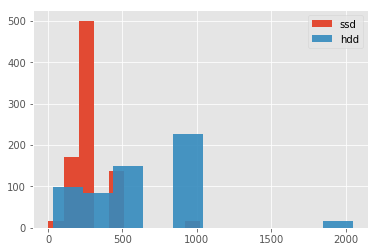

In [78]:
laptops.loc[laptops["has_ssd"], "storage_gb"].hist(label='ssd')
laptops.loc[laptops.has_hdd, "storage_gb"].hist(label='hdd', alpha=0.9)
plt.legend()